# Data Preprocessing

## Import the libraries

In [132]:
# Import statements
import numpy as np 
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import warnings
import itertools
import statsmodels.api as sm
import seaborn as sns
import math
from pylab import rcParams
from sklearn.preprocessing import MinMaxScaler

#Jupyter Notebook Specific
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

## Importing the dataset

In [133]:
df = pd.read_csv(r'/content/Crude Oil Prices Daily.csv')
df['Date'] = pd.to_datetime(df['Date'])

## Handling missing data

In [134]:
df.isnull().any()

Date     False
Price    False
dtype: bool

In [135]:
df.dropna(axis=0,inplace=True)

In [136]:
data_oil = df.reset_index()['Price']

In [137]:
len(data_oil)

9281

## Data visualization

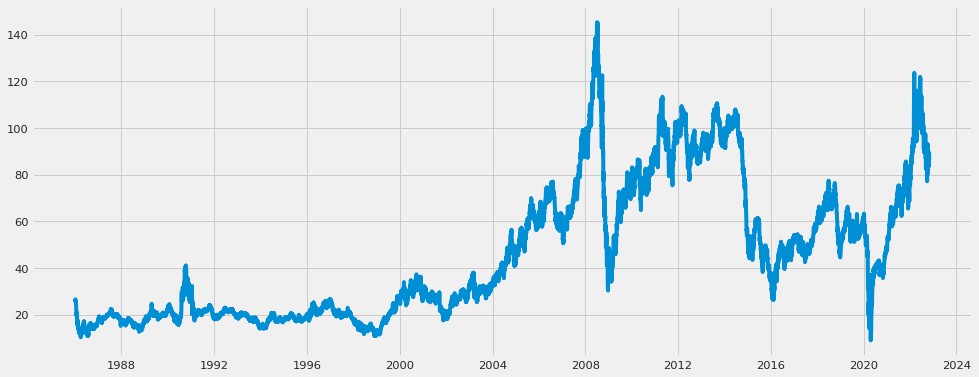

In [138]:
plt_1 = plt.figure(figsize=(15, 6))
time = pd.to_datetime(df['Date'])
data = list(df['Price'])
copdata = pd.Series(data, time)
plt.plot(copdata)

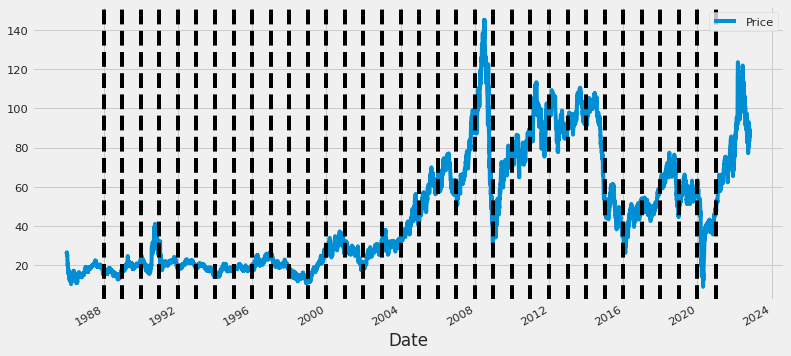

In [139]:
#observe for any seasonal patterns
ax = df.plot(x='Date', y='Price', figsize=(12,6))
xcoords = ['1988-01-01','1989-01-01','1990-01-01','1991-01-01','1992-01-01','1993-01-01','1994-01-01',
           '1995-01-01','1996-01-01','1997-01-01','1998-01-01','1999-01-01','2000-01-01','2001-01-01',
           '2002-01-01','2003-01-01','2004-01-01','2005-01-01','2006-01-01','2007-01-01','2008-01-01',
           '2009-01-01','2010-01-01','2011-01-01','2012-01-01','2013-01-01','2014-01-01','2015-01-01',
           '2016-01-01','2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01','2021-01-01']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')

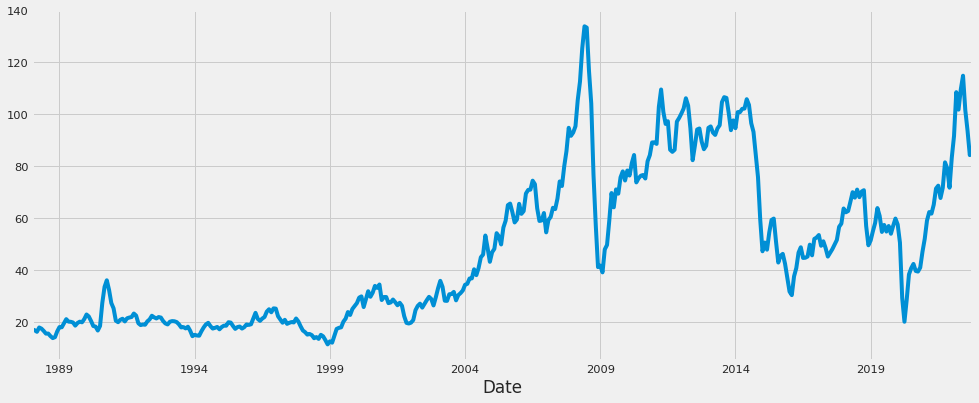

In [140]:
#Decompose the plot
df1 = df
df1 = df1.sort_values('Date')
df1 = df1.groupby('Date')['Price'].sum().reset_index()
df1.set_index('Date', inplace=True)
df1=df1.loc[datetime.date(year=1988,month=1,day=1):]

q = df1['Price'].resample('MS').mean()
q.plot(figsize=(15, 6))
plt.show()

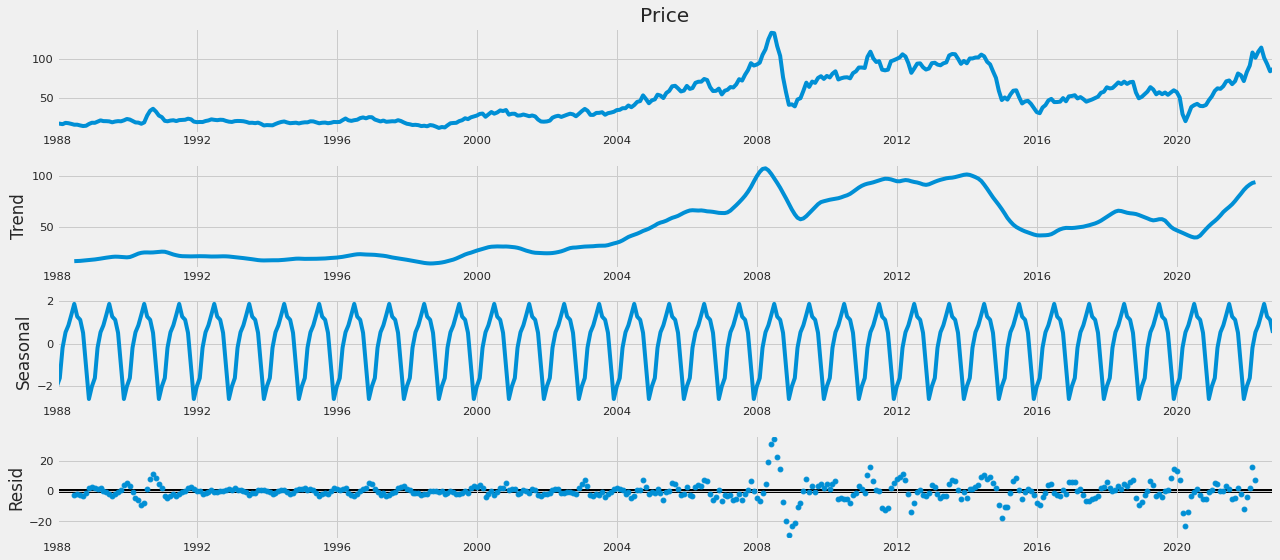

In [141]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(q, model='additive')
fig = decomposition.plot()
plt.show()

## Feature Scaling


In [142]:
sc = MinMaxScaler(feature_range = (0, 1))
data_oil = sc.fit_transform(np.array(data_oil).reshape(-1,1))

In [143]:
len(data_oil)

9281

## Train Test Split

In [144]:
train_size = int(len(data_oil) * 0.65)
test_size = len(data_oil) - train_size
train, test = data_oil[0:train_size, :], data_oil[train_size:len(data_oil), :]

In [145]:
len(test)

3249

## Creating Window

In [146]:
def create_dataset(_data_set, _look_back=1):
    data_x, data_y = [], []
    for i in range(len(_data_set) - _look_back - 1):
        a = _data_set[i:(i + _look_back), 0]
        data_x.append(a)
        data_y.append(_data_set[i + _look_back, 0])
    return np.array(data_x), np.array(data_y)


time_step = 10
X_train , Y_train = create_dataset(train,time_step)
X_test , Y_test = create_dataset(test,time_step)

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [147]:
X_train.shape

(6021, 10, 1)

# **Model Building**

## Import the Model building libraries

In [148]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Model

In [149]:
regressor = Sequential()
regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 60))
regressor.add(Dropout(0.1))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
# early_stopping = EarlyStopping(monitor='val_loss',patience=20)
history =regressor.fit(X_train, Y_train, epochs = 20, batch_size = 64,validation_data=(X_test, Y_test),verbose=1)
# history =regressor.fit(X_train, Y_train, epochs = 100, batch_size = 64,validation_data=(X_test, Y_test), callbacks=[early_stopping],shuffle=False,verbose=1)

Epoch 1/20
95/95 [==============================] - 10s 45ms/step - loss: 0.0047 - val_loss: 7.2943e-04
Epoch 2/20
95/95 [==============================] - 3s 30ms/step - loss: 4.9550e-04 - val_loss: 7.6921e-04
Epoch 3/20
95/95 [==============================] - 3s 30ms/step - loss: 4.8898e-04 - val_loss: 8.0942e-04
Epoch 4/20
95/95 [==============================] - 3s 29ms/step - loss: 5.1047e-04 - val_loss: 0.0013
Epoch 5/20
95/95 [==============================] - 3s 30ms/step - loss: 5.9421e-04 - val_loss: 0.0023
Epoch 6/20
95/95 [==============================] - 3s 30ms/step - loss: 5.2523e-04 - val_loss: 0.0013
Epoch 7/20
95/95 [==============================] - 3s 31ms/step - loss: 5.0870e-04 - val_loss: 0.0023
Epoch 8/20
95/95 [==============================] - 4s 38ms/step - loss: 5.7511e-04 - val_loss: 6.1036e-04
Epoch 9/20
95/95 [==============================] - 3s 30ms/step - loss: 4.4533e-04 - val_loss: 6.3446e-04
Epoch 10/20
95/95 [==============================] - 3s 

## Train the model

In [150]:
train_predict = regressor.predict(X_train)
test_predict = regressor.predict(X_test)

102/102 [==============================] - 1s 7ms/step


In [151]:
# invert predictions
train_predict = sc.inverse_transform(train_predict)
Y_train = sc.inverse_transform([Y_train])
test_predict = sc.inverse_transform(test_predict)
Y_test = sc.inverse_transform([Y_test])

## Model evaluation

Train Mean Absolute Error: 1.5004689769241186
Train Root Mean Squared Error: 2.03291747578067
Test Mean Absolute Error: 2.1357170599548074
Test Root Mean Squared Error: 2.9096238300262343


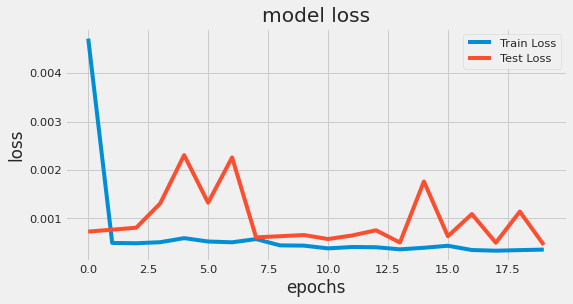

In [152]:
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

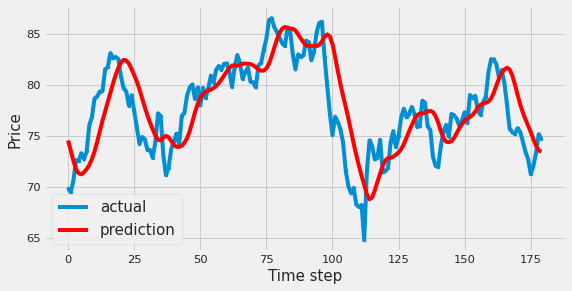

In [153]:
aa=[x for x in range(180)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:180], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:180], 'r', label="prediction")
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Price', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

## Save the model

In [154]:
regressor.save("crude_oil.h5")

## Test the model

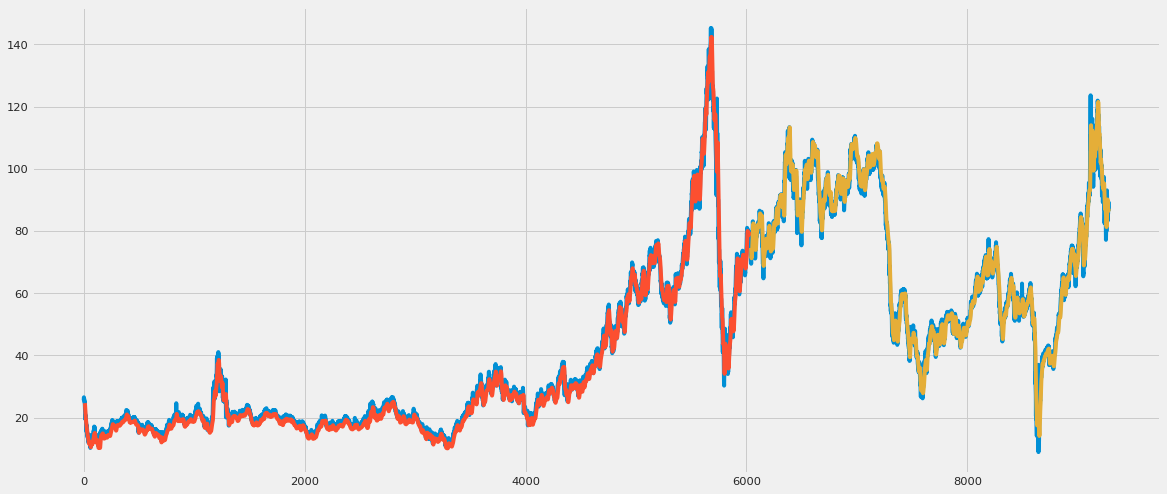

In [155]:
#test the model
look_back = 10
trainPredictPlot = np.empty_like(data_oil)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict

testPredictPlot = np.empty_like(data_oil)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data_oil)-1,:] = test_predict

plt.plot(sc.inverse_transform(data_oil))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [156]:
len(test)

3249

In [157]:
x_input = test[3239:].reshape(1,-1)
x_input.shape

(1, 10)

In [158]:
temp_input = list(x_input[0])
temp_list = temp_input[0].tolist()

In [159]:
temp_input

[0.545307917888563,
 0.5651759530791789,
 0.5653225806451613,
 0.5612903225806452,
 0.5660557184750733,
 0.5719941348973607,
 0.5900293255131964,
 0.5876099706744868,
 0.5787390029325512,
 0.5691348973607039]

In [160]:
lst_output = []
n_steps = 10
i = 0

while(i<10):
  if(len(temp_input) > 10):
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input),end="\n")
    x_input = x_input.reshape(1,-1)
    x_input = x_input.reshape((1,n_steps,1))

    yhat = regressor.predict(x_input,verbose=0)
    print("{} day output {}".format(i,yhat),end="\n")
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    print("------------------------",end="\n")
    lst_output.extend(yhat.tolist())
    i = i+1
  else:
    x_input = x_input.reshape((1,n_steps,1))
    yhat = regressor.predict(x_input,verbose=0)
    print("{} day output {}".format(i,yhat),end="\n")
    temp_input.extend(yhat[0].tolist())
    lst_output.extend(yhat.tolist())
    i = i+1

0 day output [[0.5799612]]
1 day input [0.56517595 0.56532258 0.56129032 0.56605572 0.57199413 0.59002933
 0.58760997 0.578739   0.5691349  0.57996118]
1 day output [[0.5816702]]
------------------------
2 day input [0.56532258 0.56129032 0.56605572 0.57199413 0.59002933 0.58760997
 0.578739   0.5691349  0.57996118 0.58167022]
2 day output [[0.5826853]]
------------------------
3 day input [0.56129032 0.56605572 0.57199413 0.59002933 0.58760997 0.578739
 0.5691349  0.57996118 0.58167022 0.58268529]
3 day output [[0.5836522]]
------------------------
4 day input [0.56605572 0.57199413 0.59002933 0.58760997 0.578739   0.5691349
 0.57996118 0.58167022 0.58268529 0.5836522 ]
4 day output [[0.5846932]]
------------------------
5 day input [0.57199413 0.59002933 0.58760997 0.578739   0.5691349  0.57996118
 0.58167022 0.58268529 0.5836522  0.58469319]
5 day output [[0.58570045]]
------------------------
6 day input [0.59002933 0.58760997 0.578739   0.5691349  0.57996118 0.58167022
 0.58268529

In [161]:
day_new = np.arange(1,11)
day_pred = np.arange(11,21)
len(data_oil)

print(day_new)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10]
[11 12 13 14 15 16 17 18 19 20]


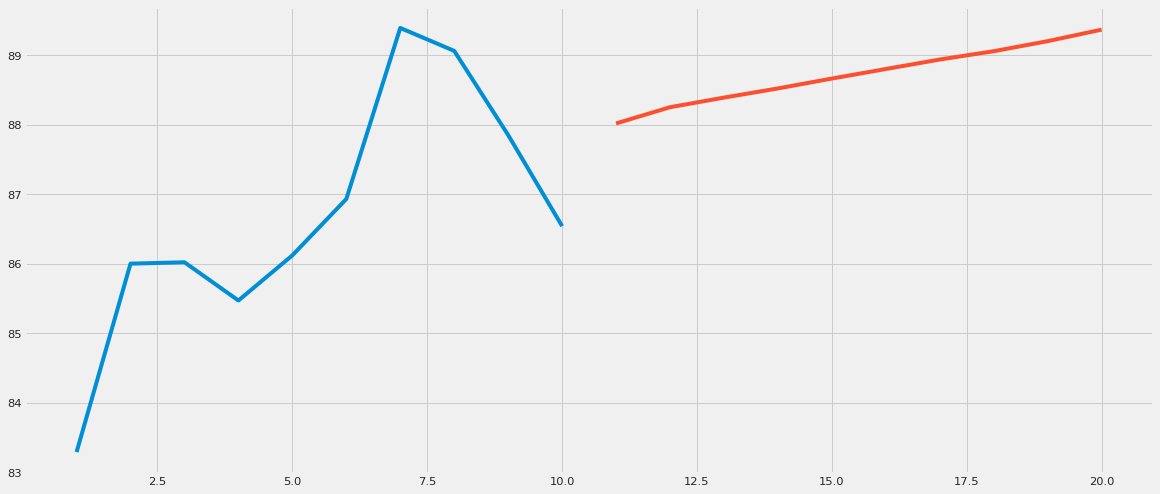

In [162]:
plt.plot(day_new,sc.inverse_transform(data_oil[9271:]))
plt.plot(day_pred,sc.inverse_transform(lst_output))